In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = "/content/Job_Role_Prediction_After_EDA.csv"
data = pd.read_csv(file_path)

In [ ]:
print("\nShape of the dataset (rows, columns):")
print(data.shape)


Shape of the dataset (rows, columns):
(2000, 49)


In [ ]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Age  Years of Experience  Skill_C++  Skill_Communication  \
0   23                    0          0                    0   
1   23                    2          1                    1   
2   27                    1          0                    0   
3   21                    3          1                    0   
4   27                    2          1                    0   

   Skill_Data Analysis  Skill_Embedded C  Skill_Excel  Skill_IoT  Skill_Java  \
0                    0                 0            0          1           0   
1                    0                 0            0          1           0   
2                    0                 0            0          0           1   
3                    0                 0            0          0           0   
4                    0                 0            0          1           0   

   Skill_Marketing  ...  University / College_NIT Trichy  \
0                1  ...                            

In [ ]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Age                                      2000 non-null   int64
 1   Years of Experience                      2000 non-null   int64
 2   Skill_C++                                2000 non-null   int64
 3   Skill_Communication                      2000 non-null   int64
 4   Skill_Data Analysis                      2000 non-null   int64
 5   Skill_Embedded C                         2000 non-null   int64
 6   Skill_Excel                              2000 non-null   int64
 7   Skill_IoT                                2000 non-null   int64
 8   Skill_Java                               2000 non-null   int64
 9   Skill_Marketing                          2000 non-null   int64
 10  Skill_Project Management                 2000 non-

In [ ]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
               Age  Years of Experience    Skill_C++  Skill_Communication  \
count  2000.000000          2000.000000  2000.000000          2000.000000   
mean     25.870500             2.438500     0.182000             0.229000   
std       2.834386             1.742336     0.385941             0.420294   
min      21.000000             0.000000     0.000000             0.000000   
25%      24.000000             1.000000     0.000000             0.000000   
50%      26.000000             2.000000     0.000000             0.000000   
75%      28.000000             4.000000     0.000000             0.000000   
max      30.000000             5.000000     1.000000             1.000000   

       Skill_Data Analysis  Skill_Embedded C  Skill_Excel    Skill_IoT  \
count          2000.000000       2000.000000  2000.000000  2000.000000   
mean              0.333000          0.215000     0.181500     0.327500   
std               0.471404          0.410925     0.385528     0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-775213921.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Preferred Job Role', data=data, order=data['Preferred Job Role'].value_counts().index, palette='crest')


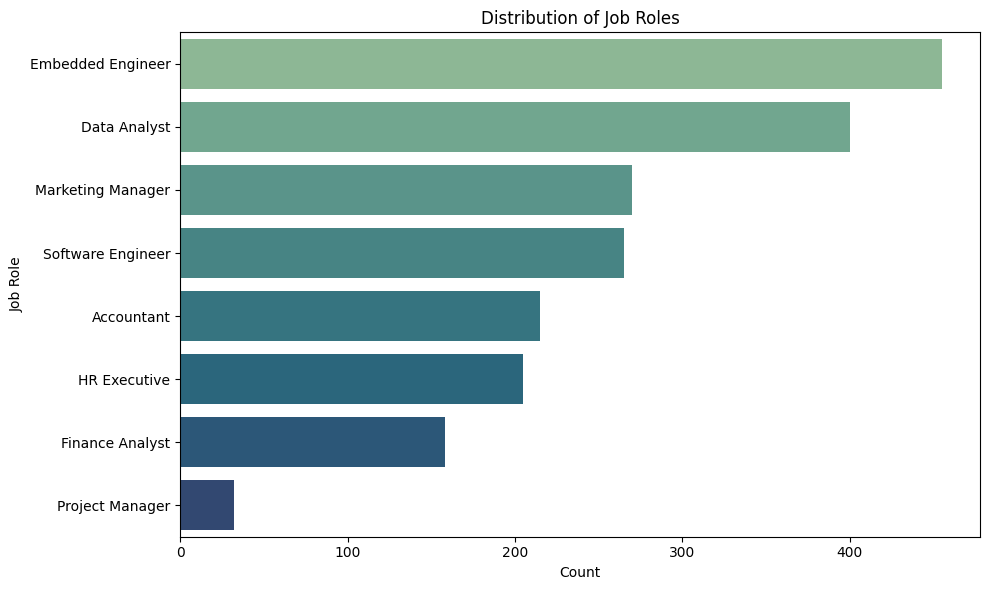

In [ ]:
# 1. Job Role Distribution
plt.figure(figsize=(10,6))

job_role_cols = [col for col in data.columns if col.startswith('Preferred Job Role_')]

# Create a new column 'Preferred Job Role' containing the actual job role
data['Preferred Job Role'] = data[job_role_cols].idxmax(axis=1).str.replace('Preferred Job Role_', '')

sns.countplot(y='Preferred Job Role', data=data, order=data['Preferred Job Role'].value_counts().index, palette='crest')
plt.title("Distribution of Job Roles")
plt.xlabel("Count")
plt.ylabel("Job Role")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1905583931.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


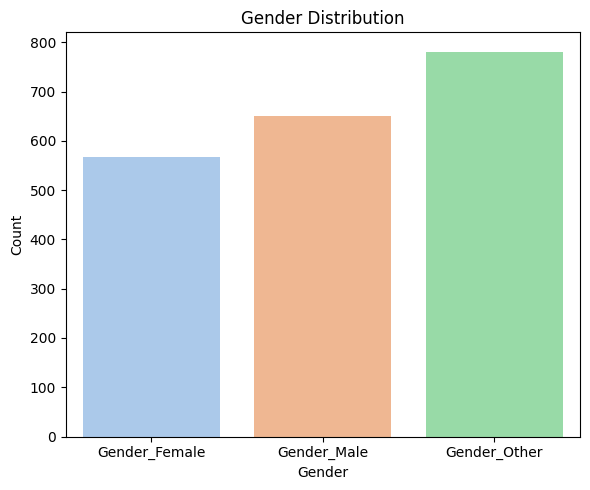

In [ ]:
# 2. Gender Distribution
plt.figure(figsize=(6,5))

gender_counts = data[['Gender_Female', 'Gender_Male', 'Gender_Other']].sum()

# Create a bar plot for gender distribution
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1554775130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Highest Qualification', data=data, order=data['Highest Qualification'].value_counts().index, palette='viridis')


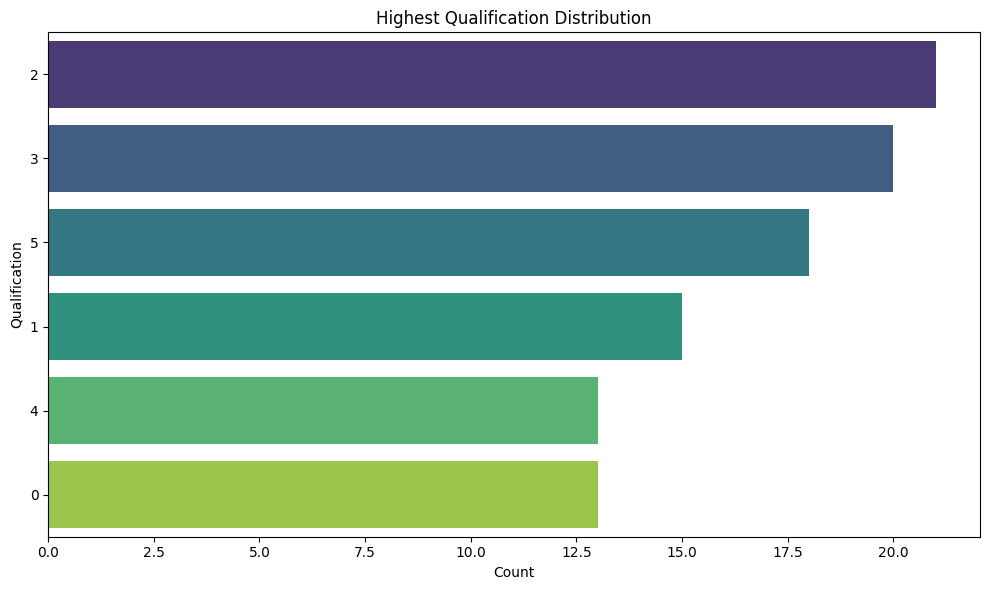

In [ ]:
# 3. Highest Qualification Distribution
plt.figure(figsize=(10,6))
sns.countplot(y='Highest Qualification', data=data, order=data['Highest Qualification'].value_counts().index, palette='viridis')
plt.title("Highest Qualification Distribution")
plt.xlabel("Count")
plt.ylabel("Qualification")
plt.tight_layout()
plt.show()

In [ ]:
# 4. Top 10 Majors / Specializations
if 'Major' in data.columns:
    top_majors = data['Major'].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_majors.values, y=top_majors.index, palette='mako')
    plt.title("Top 10 Majors / Specializations")
    plt.xlabel("Count")
    plt.ylabel("Major")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-429102107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exp_by_role.values, y=exp_by_role.index, palette='coolwarm')


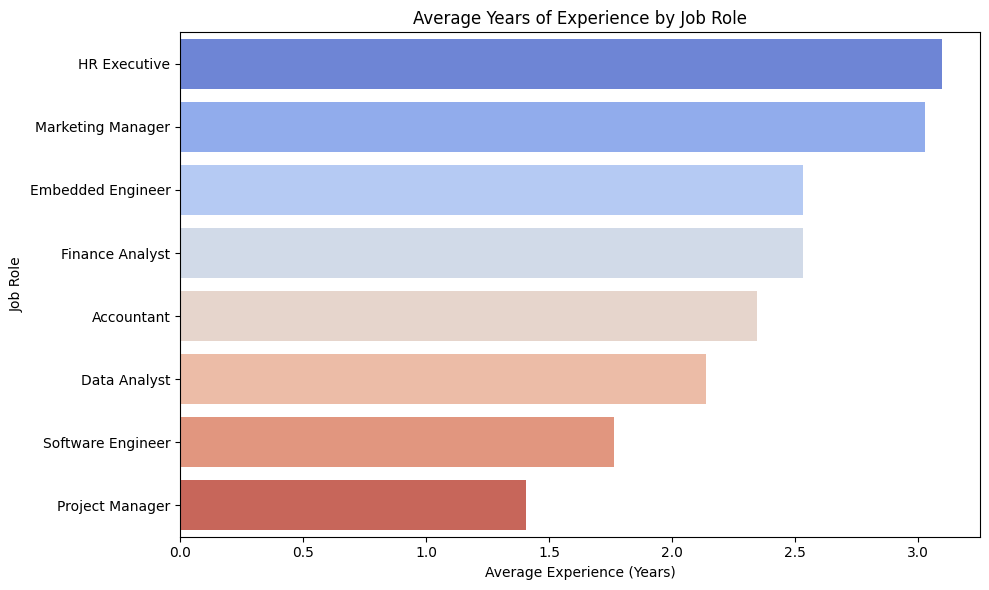

In [ ]:
# 5. Average Experience by Job Role
if 'Years of Experience' in data.columns:
    plt.figure(figsize=(10,6))
    exp_by_role = data.groupby('Preferred Job Role')['Years of Experience'].mean().sort_values(ascending=False)
    sns.barplot(x=exp_by_role.values, y=exp_by_role.index, palette='coolwarm')
    plt.title("Average Years of Experience by Job Role")
    plt.xlabel("Average Experience (Years)")
    plt.ylabel("Job Role")
    plt.tight_layout()
    plt.show()

In [ ]:
# ------------------------------------------
#  AFTER EDA: APPLY REGRESSION MODEL
# ------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:

target = 'Years of Experience'   # 👈 Change this to your numeric target column name
features = data.drop(columns=[target])
y = data[target]


In [ ]:
label_enc = LabelEncoder()
for col in features.select_dtypes(include='object').columns:
    features[col] = label_enc.fit_transform(features[col])


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)


[[ 7.51496877e-01 -4.71692577e-01 -5.44992533e-01 ... -1.27515343e-01
  -3.90816776e-01  9.03143823e-01]
 [-6.60096224e-01 -4.71692577e-01 -5.44992533e-01 ... -1.27515343e-01
  -3.90816776e-01 -2.25842416e-04]
 [-1.01299450e+00  2.12002488e+00 -5.44992533e-01 ... -1.27515343e-01
   2.55874380e+00  1.80651349e+00]
 ...
 [ 4.57003266e-02 -4.71692577e-01 -5.44992533e-01 ...  7.84219357e+00
  -3.90816776e-01  1.35482866e+00]
 [ 1.10439515e+00 -4.71692577e-01 -5.44992533e-01 ... -1.27515343e-01
  -3.90816776e-01 -9.03595508e-01]
 [ 1.45729343e+00 -4.71692577e-01  1.83488752e+00 ... -1.27515343e-01
  -3.90816776e-01 -4.51910675e-01]]
[[ 0.3985986  -0.47169258  1.83488752 ... -0.12751534 -0.39081678
  -0.90359551]
 [ 0.3985986   2.12002488 -0.54499253 ... -0.12751534 -0.39081678
  -1.35528034]
 [-1.36589277 -0.47169258 -0.54499253 ... -0.12751534 -0.39081678
  -1.35528034]
 ...
 [ 1.10439515 -0.47169258 -0.54499253 ... -0.12751534 -0.39081678
  -0.45191068]
 [ 1.45729343 -0.47169258 -0.544992

In [ ]:
# 2. LINEAR REGRESSION MODEL
# ------------------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("----- Linear Regression -----")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


----- Linear Regression -----
R² Score: 0.27025360421996203
MSE: 2.2611876210490522


In [ ]:
# 3. RANDOM FOREST REGRESSOR
# ------------------------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\n----- Random Forest Regressor -----")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


----- Random Forest Regressor -----
R² Score: 1.0
MSE: 0.0


/tmp/ipython-input-3093848166.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')


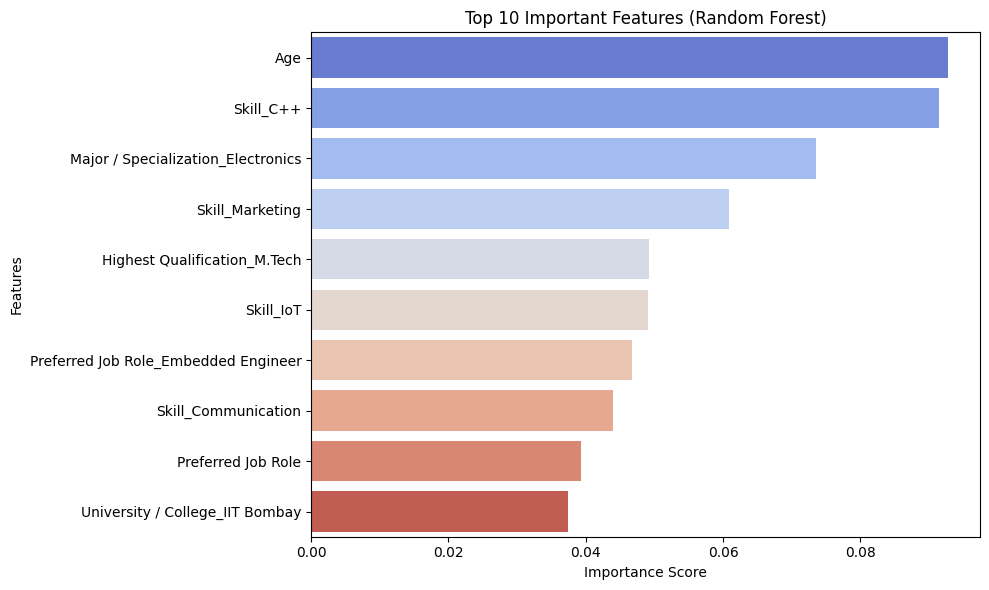

In [ ]:
# 4. FEATURE IMPORTANCE (For Random Forest)
# ------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf.feature_importances_, index=data.drop(columns=[target]).columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()